In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# GossipCop

In [12]:
# K-shot values (x-axis)
k_shots = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

data = {
    "LLaMa": [0.6679255164712748, 0.6457010103666688, 0.6177880459599309, 0.6577314598213395, 0.6292252082406891, 0.6495745254394713, 0.6520353204830424, 0.6629755533652726, 0.6513694713826091, 0.6502522676893367, 0.651766327136569, 0.6491066846449868, 0.6494006684110187, 0.6503160436862094],
    "Gemma": [0.5962110645690657, 0.5925529139365211, 0.5143715545038983, 0.5418738540690963, 0.5614267062927683, 0.5795503126600933, 0.47562651960638513, 0.5061918317662056, 0.5910820424656917, 0.5431205987907018, 0.46079071370083313, 0.5645353746215376, 0.4310082715635607, 0.3847396204678999],
    "Content-Based(RoBERTa) Graph": [0.5706466458253493, 0.5929474286476487, 0.5265031938103168, 0.5230301946074565, 0.5704651115750387, 0.5202841213260736, 0.5602835418584486, 0.4885786885786886, 0.555658661213078, 0.5334647303932498, 0.5337483493680437, 0.5081681887739821, 0.5134773634061603, 0.5046156410590983],
    "Combined Graph": [0.4150596877869605, 0.4460285132382892, 0.45550239234449763, 0.3581081081081081, 0.3815789473684211, 0.335678391959799, 0.38204833141542005, 0.3455083909180652, 0.38915779283639884, 0.37828371278458844, 0.3518705763397371, 0.34791454730417093, 0.32096635030198445, 0.31390728476821195],
    "deberta_hetero_knn_5_ensure_test_labeled_neighbor_partial_sample_unlabeled_factor_5_dissimilar": [0.5855603079555175, 0.6245096912901479, 0.5967896053652874, 0.5899553571428571, 0.615948273168442, 0.5989110166331021, 0.5947691302786774, 0.6088413187855788, 0.6098057231493741, 0.5929380760410417, 0.5986674022770218, 0.5889216792917273, 0.5898542753388138, 0.600705923003074],
    "HeteroGraph (HAN)": [0.639394304805263, 0.6376600952564733, 0.6162238651016209, 0.6013241832940862, 0.6083607512178941, 0.5929081793740231, 0.6176359453038778, 0.6114439455086303, 0.3181777481017918, 0.6187457381005667, 0.3191954062294856, 0.3155231289756255, 0.5936268034251204, 0.5984419102802163],
    "HeteroGraph (HGT)": [0.5434146578411635, 0.6450803771113665, 0.5877376076536291, 0.5329531634892428, 0.5328275022592722, 0.5857494967968426, 0.6079125216821907, 0.600259144599783, 0.6105973740290094, 0.5965777554101661, 0.5874501535987904, 0.5773450346119037, 0.5672356486958481, 0.5725695712615267]
}

# for model, record in data.items():
#     print(len(record))

/tmp/ipykernel_3304681/427854863.py:16: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


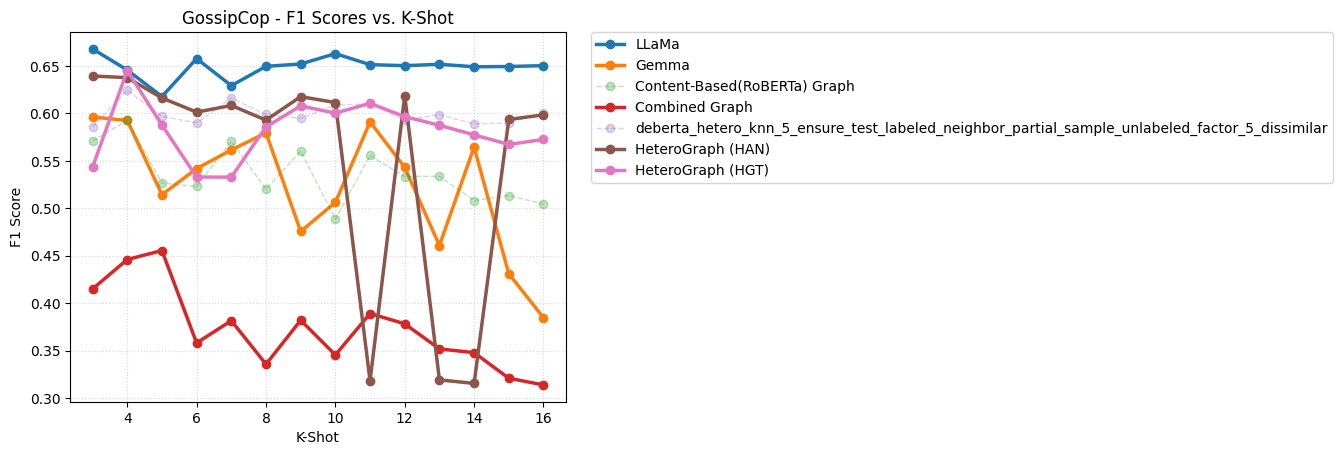

In [13]:
highlight = ["Gemma", "LLaMa", "Combined Graph", "HeteroGraph (HGT)", "HeteroGraph (HAN)"] 
colors = plt.get_cmap("tab10").colors
fig, ax = plt.subplots()

for idx, (series_name, f1_sequence) in enumerate(data.items()):
    if series_name in highlight:
        ax.plot(k_shots, f1_sequence, label=series_name, marker="o", linewidth=2.5, color=colors[idx % 10])
    else:
        ax.plot(k_shots, f1_sequence, label=series_name, marker="o", linewidth=1, color=colors[idx % 10], alpha=0.3, linestyle="--")

ax.set_xlabel("K-Shot")
ax.set_ylabel("F1 Score")
ax.set_title("GossipCop - F1 Scores vs. K-Shot")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True, linestyle=":", alpha=0.5)
plt.tight_layout()
plt.show()

# PolitiFact

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [15]:
# K-shot values (x-axis)
k_shots = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

# F1 Scores data for PolitiFact based on the provided image
# (Real: 624, Fake: 432)
data = {
    "LLaMa": [0.7419028340080972, 0.7373627862854045, 0.7861635220125787, 0.7650088087816778, 0.7548076923076923, 0.7548076923076923, 0.7880519480519481, 0.7650088087816778, 0.7373627862854045, 0.7291404612159329, 0.7291404612159329, 0.7193175564116676, 0.7200635562617362, 0.7001763668430335], 
    "Gemma": [0.712934819317798, 0.7166666666666667, 0.7031185031185031, 0.6994949494949495, 0.6911764705882353, 0.6470588235294117, 0.6178227848101265, 0.546218487394958, 0.6565656565656566, 0.6357142857142857, 0.625, 0.6351010101010102, 0.6182952182952183, 0.6056166056166056], 
    "Content-Based(RoBERTa) Graph": [0.5581395348837209, 0.6486486486486487, 0.7058823529411765, 0.6567164179104478, 0.6774193548387096, 0.6666666666666666, 0.7352941176470589, 0.6909090909090909, 0.6575342465753424, 0.6666666666666666, 0.7142857142857143, 0.7368421052631579, 0.7419354838709677, 0.7333333333333333],
    "Combined Graph": [0.6571428571428571, 0.7575757575757576, 0.7123287671232876, 0.7619047619047619, 0.7586206896551724, 0.7936507936507936, 0.7457627118644068, 0.7540983606557377, 0.7692307692307693, 0.7540983606557377, 0.7457627118644068, 0.7368421052631579, 0.75, 0.7272727272727273], 
    "deberta_hetero_label_aware_knn_5_ensure_test_labeled_neighbor_pseudo_partial_sample_unlabeled_factor_5_dissimilar_multiview_3": [0.7855008301051467, 0.7930540637307555, 0.7495535714285715, 0.7536231884057971, 0.8111111111111111, 0.8488888888888889, 0.8277608915906788, 0.8507261060452549, 0.8246016278803163, 0.8012151782643586, 0.8211572180011689, 0.8211572180011689, 0.8254114549045425, 0.8347222222222223],
    "HeteroGraph (HAN)": [0.7629219701162148, 0.7778287286484007, 0.7784749034749034, 0.7666412463231289, 0.8246016278803163, 0.8347222222222223, 0.840625, 0.8507261060452549, 0.840625, 0.8178571428571428, 0.837800999545661, 0.8417472252058718, 0.8246016278803163, 0.8347222222222223], 
    "HeteroGraph (HGT)": [0.6777426734938446, 0.7573529411764706, 0.7364341085271318, 0.6542372881355932, 0.7984189723320159, 0.8080796900940785, 0.7667359667359668, 0.840625, 0.7638888888888888, 0.7930540637307555, 0.8072744449692961, 0.7588652482269503, 0.7536231884057971, 0.7573529411764706]
}

# for model, record in data.items():
#     print(len(record))

/tmp/ipykernel_3304681/3509698491.py:18: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


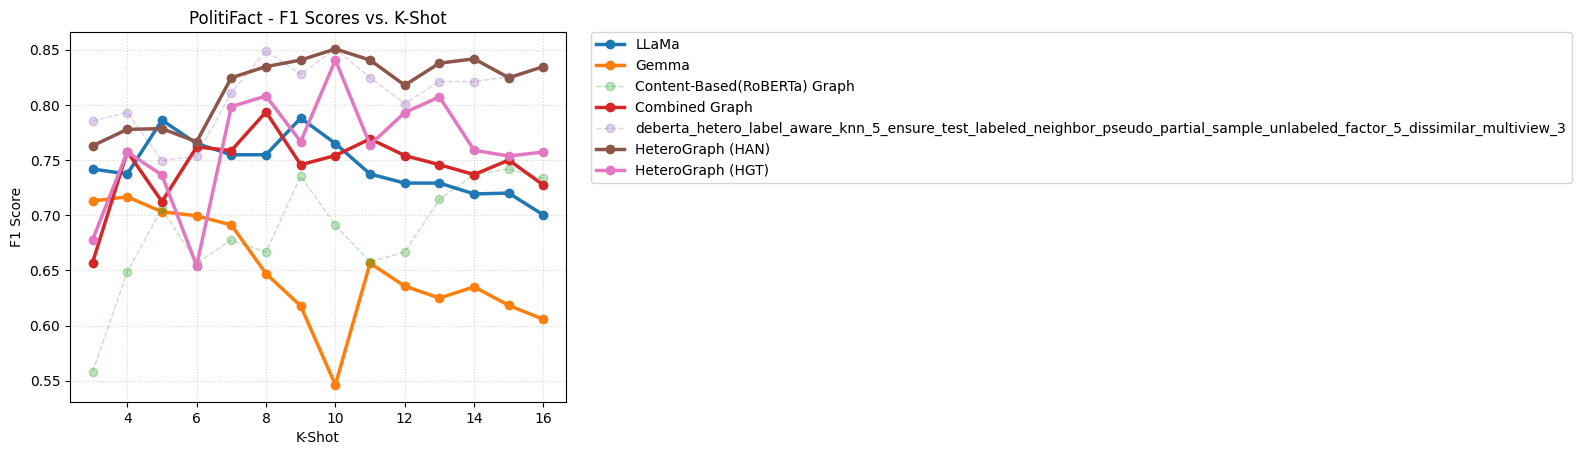

In [16]:
import matplotlib.pyplot as plt

highlight = ["Gemma", "LLaMa", "Combined Graph", "HeteroGraph (HGT)", "HeteroGraph (HAN)"]  # 你想強調的
colors = plt.get_cmap("tab10").colors
fig, ax = plt.subplots()

for idx, (series_name, f1_sequence) in enumerate(data.items()):
    if series_name in highlight:
        ax.plot(k_shots, f1_sequence, label=series_name, marker="o", linewidth=2.5, color=colors[idx % 10])
    else:
        ax.plot(k_shots, f1_sequence, label=series_name, marker="o", linewidth=1, color=colors[idx % 10], alpha=0.3, linestyle="--")

ax.set_xlabel("K-Shot")
ax.set_ylabel("F1 Score")
ax.set_title("PolitiFact - F1 Scores vs. K-Shot")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True, linestyle=":", alpha=0.5)
plt.tight_layout()
plt.show()